In [9]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['axes.labelpad'] = 15
matplotlib.rcParams['axes.titlepad'] = 20

import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm
from pathlib import Path
path_noto = Path('../fonts/NotoSansCJKkr-Regular.otf')

from matplotlib import font_manager
# font_manager.fontManager.addfont(path_noto)
plt.rc('font', family='Malgun Gothic')

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
warnings.filterwarnings('ignore')

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
colors = sns.color_palette('pastel')[0:7]


In [10]:
colors = sns.color_palette('colorblind')[0:7]


In [3]:
df = pd.read_csv("./Seoul_Park.csv")
df.insert(5, '무료합계', df.pop('무료합계'))
df.drop(columns=['외국인'], inplace=True)

df.loc[(df['날씨'] == '눈') | (df['날씨'] == '비'), '날씨'] = '눈/비'

df['날짜'] = pd.to_datetime(df['날짜'])

def replace_dash(col):
    df.loc[df[col] == '-', col] = '0'

def remove_comma(col):
    replace_dash(col)
    df[col] = df[col].str.replace(',', '').astype(float)

to_clean = ['유료합계', '무료합계', '어른', '청소년', '어린이', '단체', '총계']

for col in to_clean:
    remove_comma(col)

In [6]:
# df.drop(columns=['유료합계', '무료합계', '총계'], inplace=True)
df.tail(10)

,날짜,요일,공휴일,날씨,어른,청소년,어린이,단체
1076,2019-03-22,금,0,맑음,634.0,11.0,23.0,0.0
1077,2019-03-23,토,1,눈/비,1760.0,44.0,293.0,0.0
1078,2019-03-24,일,1,맑음,8502.0,161.0,1376.0,35.0
1079,2019-03-25,월,0,구름 많음,725.0,8.0,35.0,0.0
1080,2019-03-26,화,0,구름 조금,739.0,13.0,39.0,0.0
1081,2019-03-27,수,0,구름 많음,464.0,10.0,30.0,0.0
1082,2019-03-28,목,0,구름 많음,687.0,46.0,28.0,108.0
1083,2019-03-29,금,0,구름 조금,1447.0,120.0,77.0,188.0
1084,2019-03-30,토,1,흐림,1326.0,44.0,169.0,115.0
1085,2019-03-31,일,1,구름 조금,2563.0,111.0,387.0,0.0


In [5]:
# 억지로 결측값, 잘못된 값 만들기
df.at[1081, '공휴일'] = np.NaN
df.at[1082, '날씨'] = '3.14'
df.at[1085, '요일'] = 'SUN'
filepath = Path('./seoul.csv')
df.to_csv(filepath, index=False, encoding='utf-8-sig')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      1086 non-null   datetime64[ns]
 1   요일      1086 non-null   object        
 2   공휴일     1086 non-null   int64         
 3   날씨      946 non-null    object        
 4   어른      1086 non-null   float64       
 5   청소년     1086 non-null   float64       
 6   어린이     1086 non-null   float64       
 7   단체      1086 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 68.0+ KB


In [8]:
# 전처리
df = df[df['날씨'].notna()]
# df.isna().sum()

## EDA 1~3

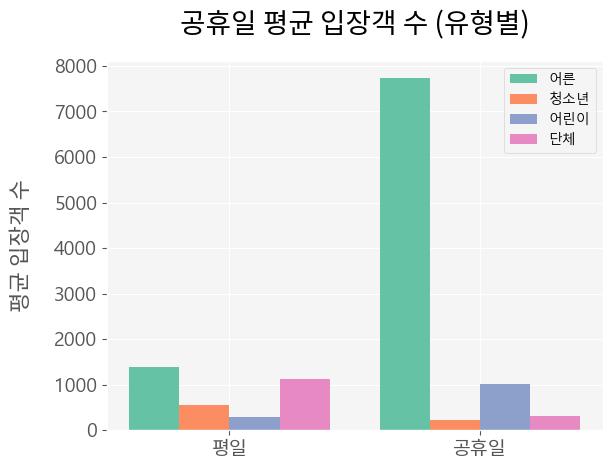

In [13]:
df_holi = df.groupby('공휴일')[['어른', '청소년', '어린이', '단체']].mean().reset_index()

labels = ['평일', '공휴일']
x = np.arange(len(labels))
width=0.2

barcolors = sns.color_palette("Set2").as_hex()

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.3, df_holi['어른'], width, label='어른', color=barcolors[0])
rects2 = ax.bar(x - 0.1, df_holi['청소년'], width, label='청소년', color=barcolors[1])
rects3 = ax.bar(x + 0.1, df_holi['어린이'], width, label='어린이', color=barcolors[2])
rects4 = ax.bar(x + 0.3, df_holi['단체'], width, label='단체', color=barcolors[3])
# rects5 = ax.bar(x + width + 0.2, df_holi['어린이'], width, label='어린이')
# rects3 = ax.bar(x 

ax.set_title("공휴일 평균 입장객 수 (유형별)", font=path_noto, fontsize=20)
ax.set_ylabel('평균 입장객 수', font=path_noto, fontsize=16)
ax.set_xticks(x, labels, font=path_noto, fontsize=14)
ax.legend()

ax.ticklabel_format(axis='y', style='plain')

plt.yticks(fontsize=14)
plt.show()

In [199]:
df_holi.to_csv('./seoul_eda1.csv', index=False, encoding='utf-8-sig')

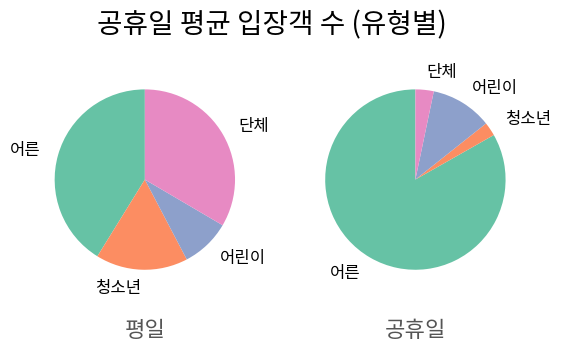

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2)

labels = ['어른', '청소년', '어린이', '단체']
axs[0].pie(df_holi.iloc[0, 1:].values, labels=labels, startangle=90, colors=barcolors, textprops={'font':path_noto, 'fontsize':12}, labeldistance=1.2)
axs[0].set_xlabel("평일", font=path_noto, fontsize=16)

axs[1].pie(df_holi.iloc[1, 1:].values, labels=labels, startangle=90, colors=barcolors, textprops={'font':path_noto, 'fontsize':12}, labeldistance=1.2)
axs[1].set_xlabel("공휴일", font=path_noto, fontsize=16)

fig.suptitle("공휴일 평균 입장객 수 (유형별)", font=path_noto, fontsize=20, y=0.85)

plt.show()

In [209]:
df_holi

,공휴일,어른,청소년,어린이,단체
0,0,1389.259434,557.278302,298.643082,1128.463836
1,1,7729.487097,228.738710,1025.274194,304.383871


## EDA 4

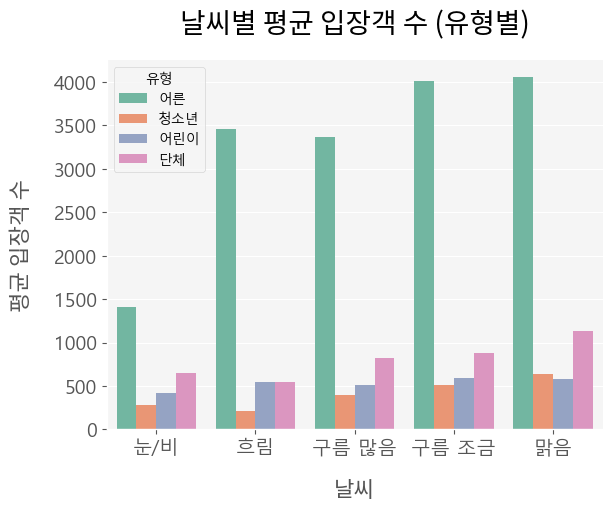

In [30]:
df_weather = df.groupby('날씨')[['어른', '청소년', '어린이', '단체']].mean().reset_index().reindex([2, 4, 0, 1, 3])
# df_weather

tidy = df_weather.melt(id_vars='날씨').rename(columns=str.title)

# tidy = tidy.reindex([2, 4, 0, 1, 3])
# tidy

fig, ax = plt.subplots()

ax = sns.barplot(x='날씨', y='Value', hue='Variable', data=tidy, palette=barcolors)
ax.set_title("날씨별 평균 입장객 수 (유형별)", font=path_noto, fontsize=20)
ax.set_xlabel("날씨", font=path_noto, fontsize=16)
ax.set_ylabel("평균 입장객 수", font=path_noto, fontsize=16)

plt.legend(title="유형")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(fig)

In [26]:
df_weather_sum = df.groupby('날씨')[['어른', '청소년', '어린이', '단체']].sum().reset_index()
df_weather_mean = df.groupby('날씨')[['어른', '청소년', '어린이', '단체']].mean().reset_index()
df_weather_mean

,날씨,어른,청소년,어린이,단체
0,구름 많음,3362.703971,399.927798,506.801444,819.425993
1,구름 조금,4012.063559,510.991525,587.555085,883.622881
2,눈/비,1411.900901,282.765766,421.099099,643.918919
3,맑음,4051.324324,638.342342,575.518018,1127.621622
4,흐림,3452.790000,208.650000,542.180000,547.390000


## EDA 6

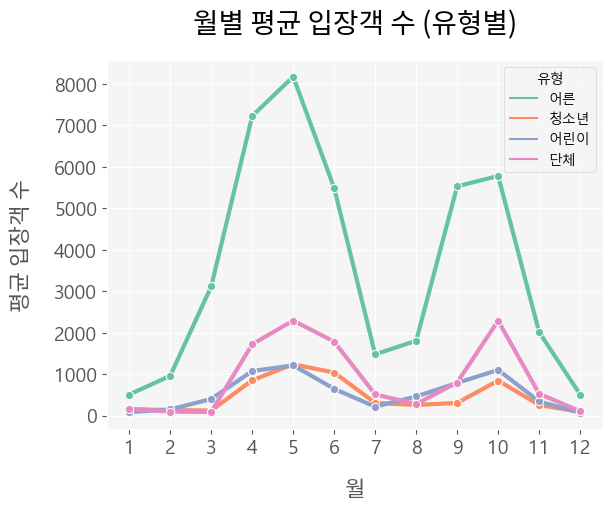

In [32]:
df['월'] = df['날짜'].dt.month

df_month = df.groupby('월')[['어른', '청소년', '어린이', '단체']].mean().reset_index()
df_month_tidy = df_month.melt('월', var_name='cols', value_name='vals')
# df_month_tidy

fig, ax = plt.subplots()

ax = sns.lineplot(data=df_month_tidy, x='월', y='vals', hue='cols', marker='o', palette=barcolors, linewidth=3)
ax.set_title("월별 평균 입장객 수 (유형별)", font=path_noto, fontsize=20)
ax.set_xlabel("월", font=path_noto, fontsize=16)
ax.set_ylabel("평균 입장객 수", font=path_noto, fontsize=16)
ax.set_xticks(range(1, 13))
plt.legend(title='유형')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()